In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_features = pd.read_csv('house_price_index_train_features.csv')
df_labels = pd.read_csv('house_price_index_train_labels.csv')
df_test_features = pd.read_csv('house_price_index_test_features.csv')
df_features

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period
0,traditional,all-transactions,quarterly,State,Georgia,GA,2008,3
1,traditional,all-transactions,quarterly,State,North Carolina,NC,1990,3
2,traditional,all-transactions,quarterly,MSA,"Florence, SC",22500,2010,1
3,traditional,all-transactions,quarterly,MSA,"Bridgeport-Stamford-Norwalk, CT",14860,1983,4
4,traditional,all-transactions,quarterly,MSA,"Salem, OR",41420,2021,4
...,...,...,...,...,...,...,...,...
97164,traditional,all-transactions,quarterly,MSA,"Anaheim-Santa Ana-Irvine, CA (MSAD)",11244,2010,3
97165,traditional,all-transactions,quarterly,MSA,"Mount Vernon-Anacortes, WA",34580,2016,4
97166,traditional,all-transactions,quarterly,MSA,"Enid, OK",21420,1997,2
97167,traditional,all-transactions,quarterly,MSA,"Lincoln, NE",30700,1985,4


In [3]:
df_total = pd.concat([df_features, df_labels], axis =1 )
df_total

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa
0,traditional,all-transactions,quarterly,State,Georgia,GA,2008,3,313.00
1,traditional,all-transactions,quarterly,State,North Carolina,NC,1990,3,163.20
2,traditional,all-transactions,quarterly,MSA,"Florence, SC",22500,2010,1,161.76
3,traditional,all-transactions,quarterly,MSA,"Bridgeport-Stamford-Norwalk, CT",14860,1983,4,53.77
4,traditional,all-transactions,quarterly,MSA,"Salem, OR",41420,2021,4,365.65
...,...,...,...,...,...,...,...,...,...
97164,traditional,all-transactions,quarterly,MSA,"Anaheim-Santa Ana-Irvine, CA (MSAD)",11244,2010,3,240.70
97165,traditional,all-transactions,quarterly,MSA,"Mount Vernon-Anacortes, WA",34580,2016,4,217.56
97166,traditional,all-transactions,quarterly,MSA,"Enid, OK",21420,1997,2,108.84
97167,traditional,all-transactions,quarterly,MSA,"Lincoln, NE",30700,1985,4,69.06


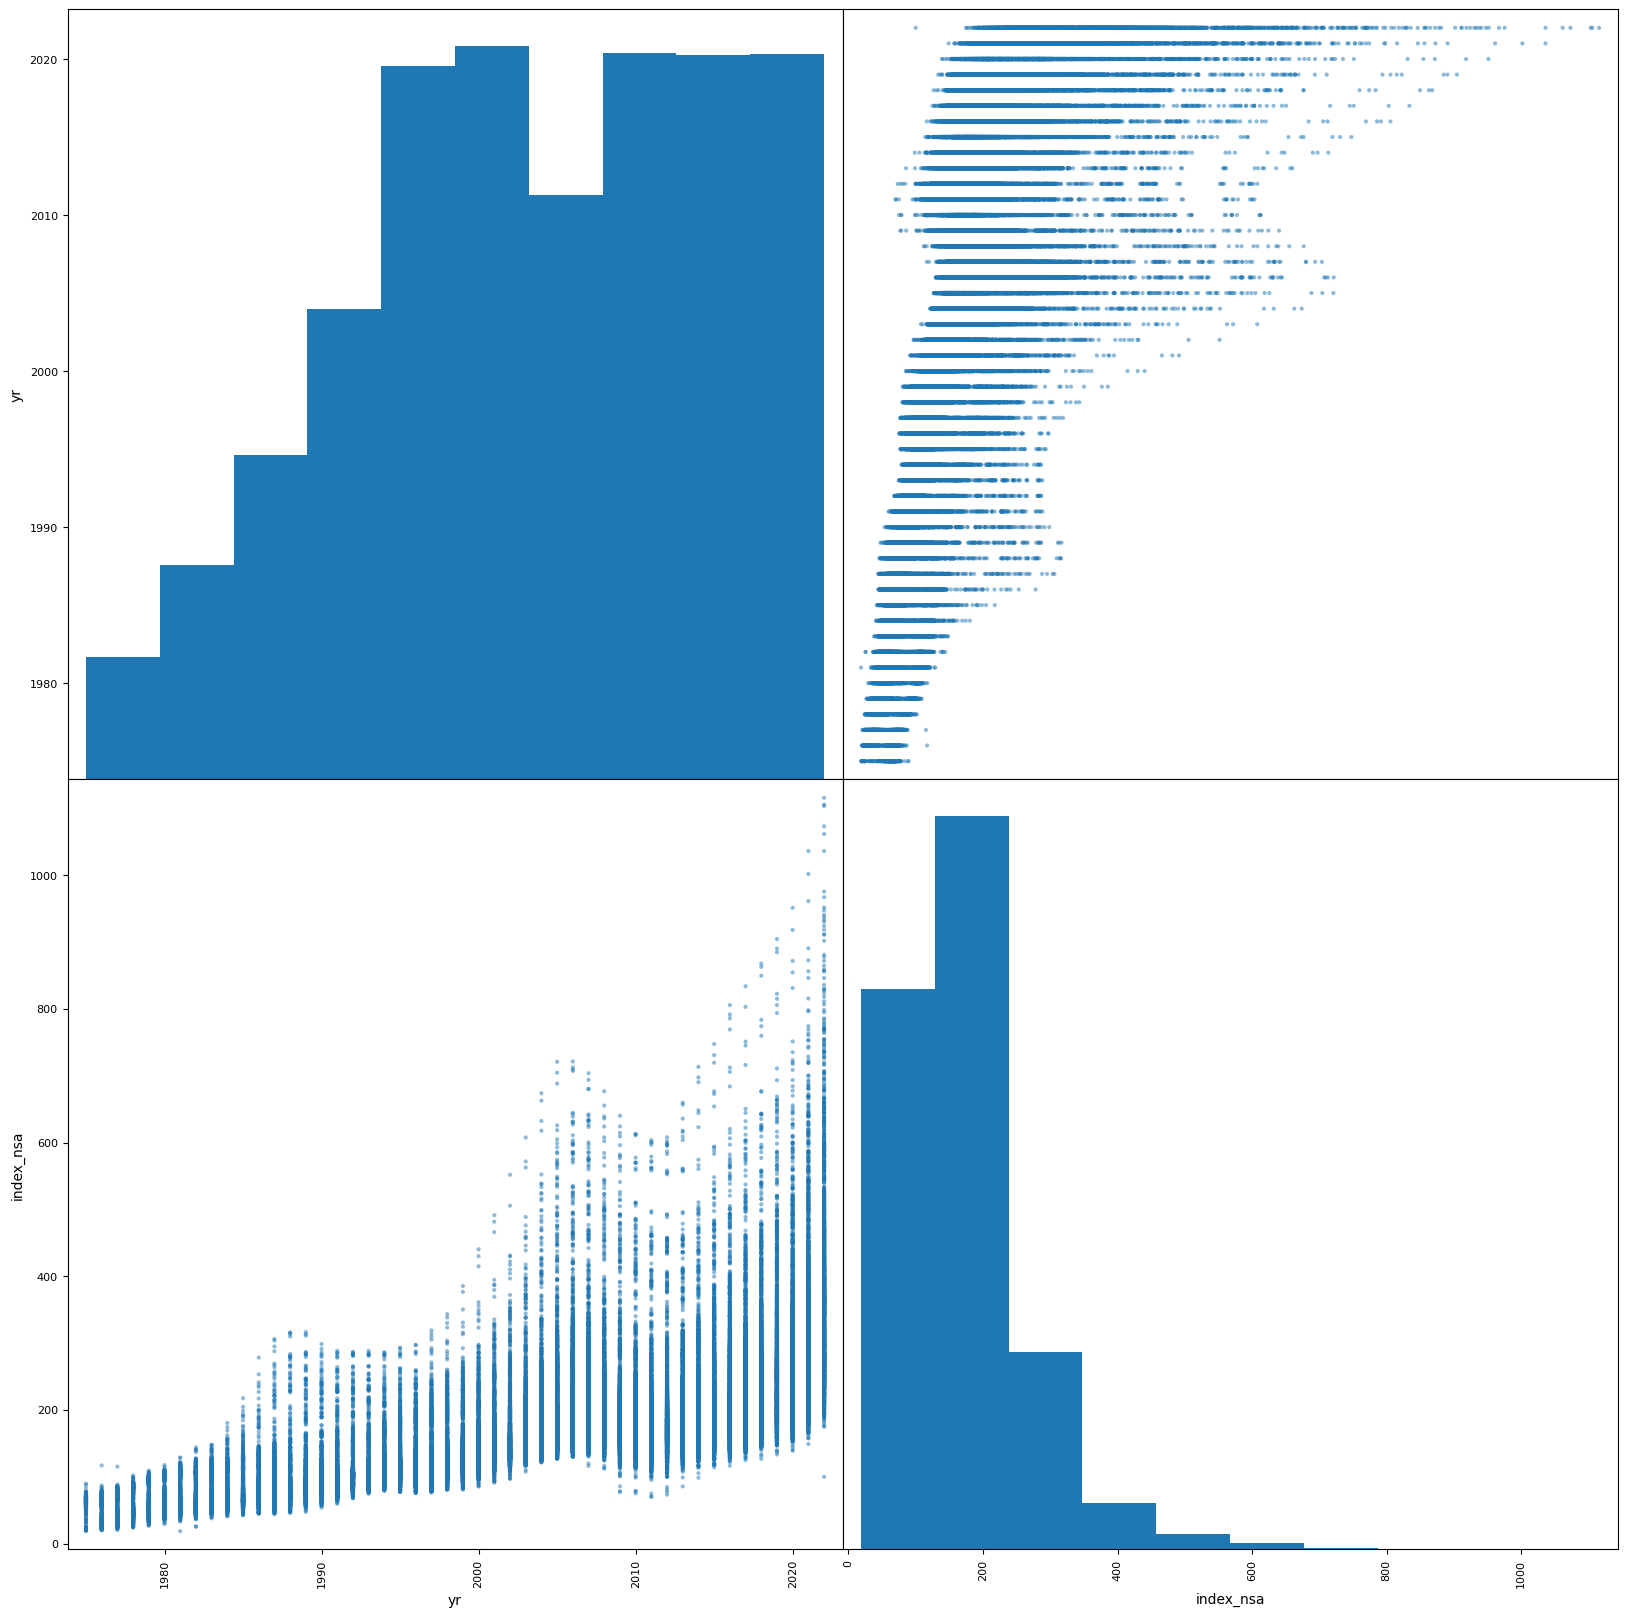

In [4]:
from pandas.plotting import scatter_matrix

attributes = ['yr', 'index_nsa']
scatter_matrix(df_total[attributes], figsize=(20, 20))
plt.show()

### index_nsa vs yr graph suggest that there is a overall increase but there is decrease at some places as well

In [5]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97169 entries, 0 to 97168
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hpi_type    97169 non-null  object
 1   hpi_flavor  97169 non-null  object
 2   frequency   97169 non-null  object
 3   level       97169 non-null  object
 4   place_name  97169 non-null  object
 5   place_id    97169 non-null  object
 6   yr          97169 non-null  int64 
 7   period      97169 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


In [6]:
df_features.describe()

,yr,period
count,97169.000000,97169.000000
mean,2003.576202,2.627875
std,11.559991,1.442976
min,1975.000000,1.000000
25%,1995.000000,2.000000
50%,2004.000000,3.000000
75%,2013.000000,4.000000
max,2022.000000,12.000000


In [7]:
from scipy.stats import chi2_contingency

# Perform chi-square test
contingency_table = pd.crosstab(df_features['place_name'], df_features['place_id'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
p_value

0.0

In [8]:
df_features.drop(['place_id'], axis = 1, inplace = True)

### Place name and Place id both provide same information, keeping both increases redundancy

In [9]:
df_features

,hpi_type,hpi_flavor,frequency,level,place_name,yr,period
0,traditional,all-transactions,quarterly,State,Georgia,2008,3
1,traditional,all-transactions,quarterly,State,North Carolina,1990,3
2,traditional,all-transactions,quarterly,MSA,"Florence, SC",2010,1
3,traditional,all-transactions,quarterly,MSA,"Bridgeport-Stamford-Norwalk, CT",1983,4
4,traditional,all-transactions,quarterly,MSA,"Salem, OR",2021,4
...,...,...,...,...,...,...,...
97164,traditional,all-transactions,quarterly,MSA,"Anaheim-Santa Ana-Irvine, CA (MSAD)",2010,3
97165,traditional,all-transactions,quarterly,MSA,"Mount Vernon-Anacortes, WA",2016,4
97166,traditional,all-transactions,quarterly,MSA,"Enid, OK",1997,2
97167,traditional,all-transactions,quarterly,MSA,"Lincoln, NE",1985,4


In [10]:
df_new_features = df_features.iloc[:, :-2]
df_numeric_features = df_features.iloc[:, 5:]
df_new_features

,hpi_type,hpi_flavor,frequency,level,place_name
0,traditional,all-transactions,quarterly,State,Georgia
1,traditional,all-transactions,quarterly,State,North Carolina
2,traditional,all-transactions,quarterly,MSA,"Florence, SC"
3,traditional,all-transactions,quarterly,MSA,"Bridgeport-Stamford-Norwalk, CT"
4,traditional,all-transactions,quarterly,MSA,"Salem, OR"
...,...,...,...,...,...
97164,traditional,all-transactions,quarterly,MSA,"Anaheim-Santa Ana-Irvine, CA (MSAD)"
97165,traditional,all-transactions,quarterly,MSA,"Mount Vernon-Anacortes, WA"
97166,traditional,all-transactions,quarterly,MSA,"Enid, OK"
97167,traditional,all-transactions,quarterly,MSA,"Lincoln, NE"


In [11]:
df_numeric_features

,yr,period
0,2008,3
1,1990,3
2,2010,1
3,1983,4
4,2021,4
...,...,...
97164,2010,3
97165,2016,4
97166,1997,2
97167,1985,4


## Applying One Hot Encoding


In [12]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# fit and transform the encoder to the categorical columns
df_new_encoded = pd.DataFrame(encoder.fit_transform(df_new_features[['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name']]).toarray(), 
                          columns=encoder.get_feature_names_out(['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name']))

df_new_encoded

,hpi_type_developmental,hpi_type_distress-free,hpi_type_non-metro,hpi_type_traditional,hpi_flavor_all-transactions,hpi_flavor_expanded-data,hpi_flavor_purchase-only,frequency_monthly,frequency_quarterly,level_MSA,...,"place_name_Winchester, VA-WV","place_name_Winston-Salem, NC",place_name_Wisconsin,"place_name_Worcester, MA-CT",place_name_Wyoming,"place_name_Yakima, WA","place_name_York-Hanover, PA","place_name_Youngstown-Warren-Boardman, OH-PA","place_name_Yuba City, CA","place_name_Yuma, AZ"
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97164,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97165,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97166,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97167,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
frames =[df_new_encoded, df_numeric_features]
df_required = pd.concat(frames, axis = 1)
df_required

,hpi_type_developmental,hpi_type_distress-free,hpi_type_non-metro,hpi_type_traditional,hpi_flavor_all-transactions,hpi_flavor_expanded-data,hpi_flavor_purchase-only,frequency_monthly,frequency_quarterly,level_MSA,...,place_name_Wisconsin,"place_name_Worcester, MA-CT",place_name_Wyoming,"place_name_Yakima, WA","place_name_York-Hanover, PA","place_name_Youngstown-Warren-Boardman, OH-PA","place_name_Yuba City, CA","place_name_Yuma, AZ",yr,period
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008,3
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,3
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1983,4
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97164,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,3
97165,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4
97166,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997,2
97167,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,4


## Applying train test split

In [14]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_required, df_labels, test_size=0.2, random_state =42)

### The data is increasing in non linear fashion and It is increasing/ decreasing in groups so a KNN algorithm could be useful

### KNN

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(train_x, train_y)


KNeighborsRegressor()

In [16]:
## Grid search cv

from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}

grid_search = GridSearchCV(knn, params, cv=5)
grid_search.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]})

In [17]:
grid_search.best_params_

{'n_neighbors': 1}

### GridSearch CV gives k value as 1 

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(train_x, train_y)


KNeighborsRegressor(n_neighbors=1)

In [19]:
hyp = knn.predict(test_x)
hyp

array([[105.72],
       [174.06],
       [155.96],
       ...,
       [268.72],
       [123.2 ],
       [103.64]])

In [20]:
test_y

,index_nsa
76232,100.00
16800,176.23
51665,150.00
62082,160.92
62300,155.92
...,...
74141,98.31
48124,145.75
9902,297.42
55996,121.99


### RMSE

In [21]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_y, hyp))
rmse

19.847719108056793

## Test on the testing features

In [22]:
df_test_features

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period
0,traditional,all-transactions,quarterly,MSA,"Tacoma-Lakewood, WA (MSAD)",45104,2000,1
1,traditional,all-transactions,quarterly,MSA,"Roanoke, VA",40220,2018,3
2,traditional,all-transactions,quarterly,MSA,"Amarillo, TX",11100,2019,4
3,traditional,all-transactions,quarterly,MSA,"Naples-Marco Island, FL",34940,1995,1
4,traditional,all-transactions,quarterly,MSA,"Hartford-East Hartford-Middletown, CT",25540,2004,2
...,...,...,...,...,...,...,...,...
24288,traditional,all-transactions,quarterly,MSA,"Cheyenne, WY",16940,1985,3
24289,traditional,all-transactions,quarterly,MSA,"Flagstaff, AZ",22380,1987,3
24290,non-metro,all-transactions,quarterly,State,Illinois,IL,2019,2
24291,traditional,purchase-only,quarterly,MSA,"Grand Rapids-Kentwood, MI",24340,2009,2


In [23]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24293 entries, 0 to 24292
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hpi_type    24293 non-null  object
 1   hpi_flavor  24293 non-null  object
 2   frequency   24293 non-null  object
 3   level       24293 non-null  object
 4   place_name  24293 non-null  object
 5   place_id    24293 non-null  object
 6   yr          24293 non-null  int64 
 7   period      24293 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [24]:
df_test_features.describe()

,yr,period
count,24293.000000,24293.000000
mean,2003.703618,2.642778
std,11.546540,1.431227
min,1975.000000,1.000000
25%,1995.000000,2.000000
50%,2004.000000,3.000000
75%,2013.000000,4.000000
max,2022.000000,12.000000


In [25]:
df_test_features.drop(['place_id'], axis = 1, inplace = True)

In [26]:
df_new_test_features = df_test_features.iloc[:, :-2]
df_numeric_test_features = df_test_features.iloc[:, 5:]
df_new_test_features

,hpi_type,hpi_flavor,frequency,level,place_name
0,traditional,all-transactions,quarterly,MSA,"Tacoma-Lakewood, WA (MSAD)"
1,traditional,all-transactions,quarterly,MSA,"Roanoke, VA"
2,traditional,all-transactions,quarterly,MSA,"Amarillo, TX"
3,traditional,all-transactions,quarterly,MSA,"Naples-Marco Island, FL"
4,traditional,all-transactions,quarterly,MSA,"Hartford-East Hartford-Middletown, CT"
...,...,...,...,...,...
24288,traditional,all-transactions,quarterly,MSA,"Cheyenne, WY"
24289,traditional,all-transactions,quarterly,MSA,"Flagstaff, AZ"
24290,non-metro,all-transactions,quarterly,State,Illinois
24291,traditional,purchase-only,quarterly,MSA,"Grand Rapids-Kentwood, MI"


In [27]:
df_numeric_test_features

,yr,period
0,2000,1
1,2018,3
2,2019,4
3,1995,1
4,2004,2
...,...,...
24288,1985,3
24289,1987,3
24290,2019,2
24291,2009,2


## Apply One Hot Encoding on Test Features

In [28]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# fit and transform the encoder to the categorical columns
df_new_test_encoded = pd.DataFrame(encoder.fit_transform(df_new_test_features[['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name']]).toarray(), 
                          columns=encoder.get_feature_names_out(['hpi_type', 'hpi_flavor', 'frequency', 'level', 'place_name']))

df_new_test_encoded

,hpi_type_developmental,hpi_type_distress-free,hpi_type_non-metro,hpi_type_traditional,hpi_flavor_all-transactions,hpi_flavor_expanded-data,hpi_flavor_purchase-only,frequency_monthly,frequency_quarterly,level_MSA,...,"place_name_Winchester, VA-WV","place_name_Winston-Salem, NC",place_name_Wisconsin,"place_name_Worcester, MA-CT",place_name_Wyoming,"place_name_Yakima, WA","place_name_York-Hanover, PA","place_name_Youngstown-Warren-Boardman, OH-PA","place_name_Yuba City, CA","place_name_Yuma, AZ"
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24288,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24289,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24290,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24291,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
new_frames =[df_new_test_encoded, df_numeric_test_features]
df_test_required = pd.concat(new_frames, axis = 1)
df_test_required

,hpi_type_developmental,hpi_type_distress-free,hpi_type_non-metro,hpi_type_traditional,hpi_flavor_all-transactions,hpi_flavor_expanded-data,hpi_flavor_purchase-only,frequency_monthly,frequency_quarterly,level_MSA,...,place_name_Wisconsin,"place_name_Worcester, MA-CT",place_name_Wyoming,"place_name_Yakima, WA","place_name_York-Hanover, PA","place_name_Youngstown-Warren-Boardman, OH-PA","place_name_Yuba City, CA","place_name_Yuma, AZ",yr,period
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000,1
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,3
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,4
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1995,1
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24288,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985,3
24289,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1987,3
24290,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019,2
24291,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,2


In [30]:
new_hyp = knn.predict(df_test_required)
new_hyp

array([[123.93],
       [191.05],
       [204.49],
       ...,
       [169.85],
       [149.02],
       [138.16]])

In [31]:
target = pd.DataFrame(new_hyp)
target.rename(columns={0:'hpi'}, inplace=True)
target

,hpi
0,123.93
1,191.05
2,204.49
3,99.47
4,147.93
...,...
24288,75.45
24289,69.04
24290,169.85
24291,149.02


In [32]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_y, hyp))
rmse

19.847719108056793

In [33]:
target.to_csv('target.csv', index=False)

## Combining test features and labels to draw a graph

In [34]:
df_test_total = pd.concat([df_test_features, target], axis =1 )
df_test_total

,hpi_type,hpi_flavor,frequency,level,place_name,yr,period,hpi
0,traditional,all-transactions,quarterly,MSA,"Tacoma-Lakewood, WA (MSAD)",2000,1,123.93
1,traditional,all-transactions,quarterly,MSA,"Roanoke, VA",2018,3,191.05
2,traditional,all-transactions,quarterly,MSA,"Amarillo, TX",2019,4,204.49
3,traditional,all-transactions,quarterly,MSA,"Naples-Marco Island, FL",1995,1,99.47
4,traditional,all-transactions,quarterly,MSA,"Hartford-East Hartford-Middletown, CT",2004,2,147.93
...,...,...,...,...,...,...,...,...
24288,traditional,all-transactions,quarterly,MSA,"Cheyenne, WY",1985,3,75.45
24289,traditional,all-transactions,quarterly,MSA,"Flagstaff, AZ",1987,3,69.04
24290,non-metro,all-transactions,quarterly,State,Illinois,2019,2,169.85
24291,traditional,purchase-only,quarterly,MSA,"Grand Rapids-Kentwood, MI",2009,2,149.02


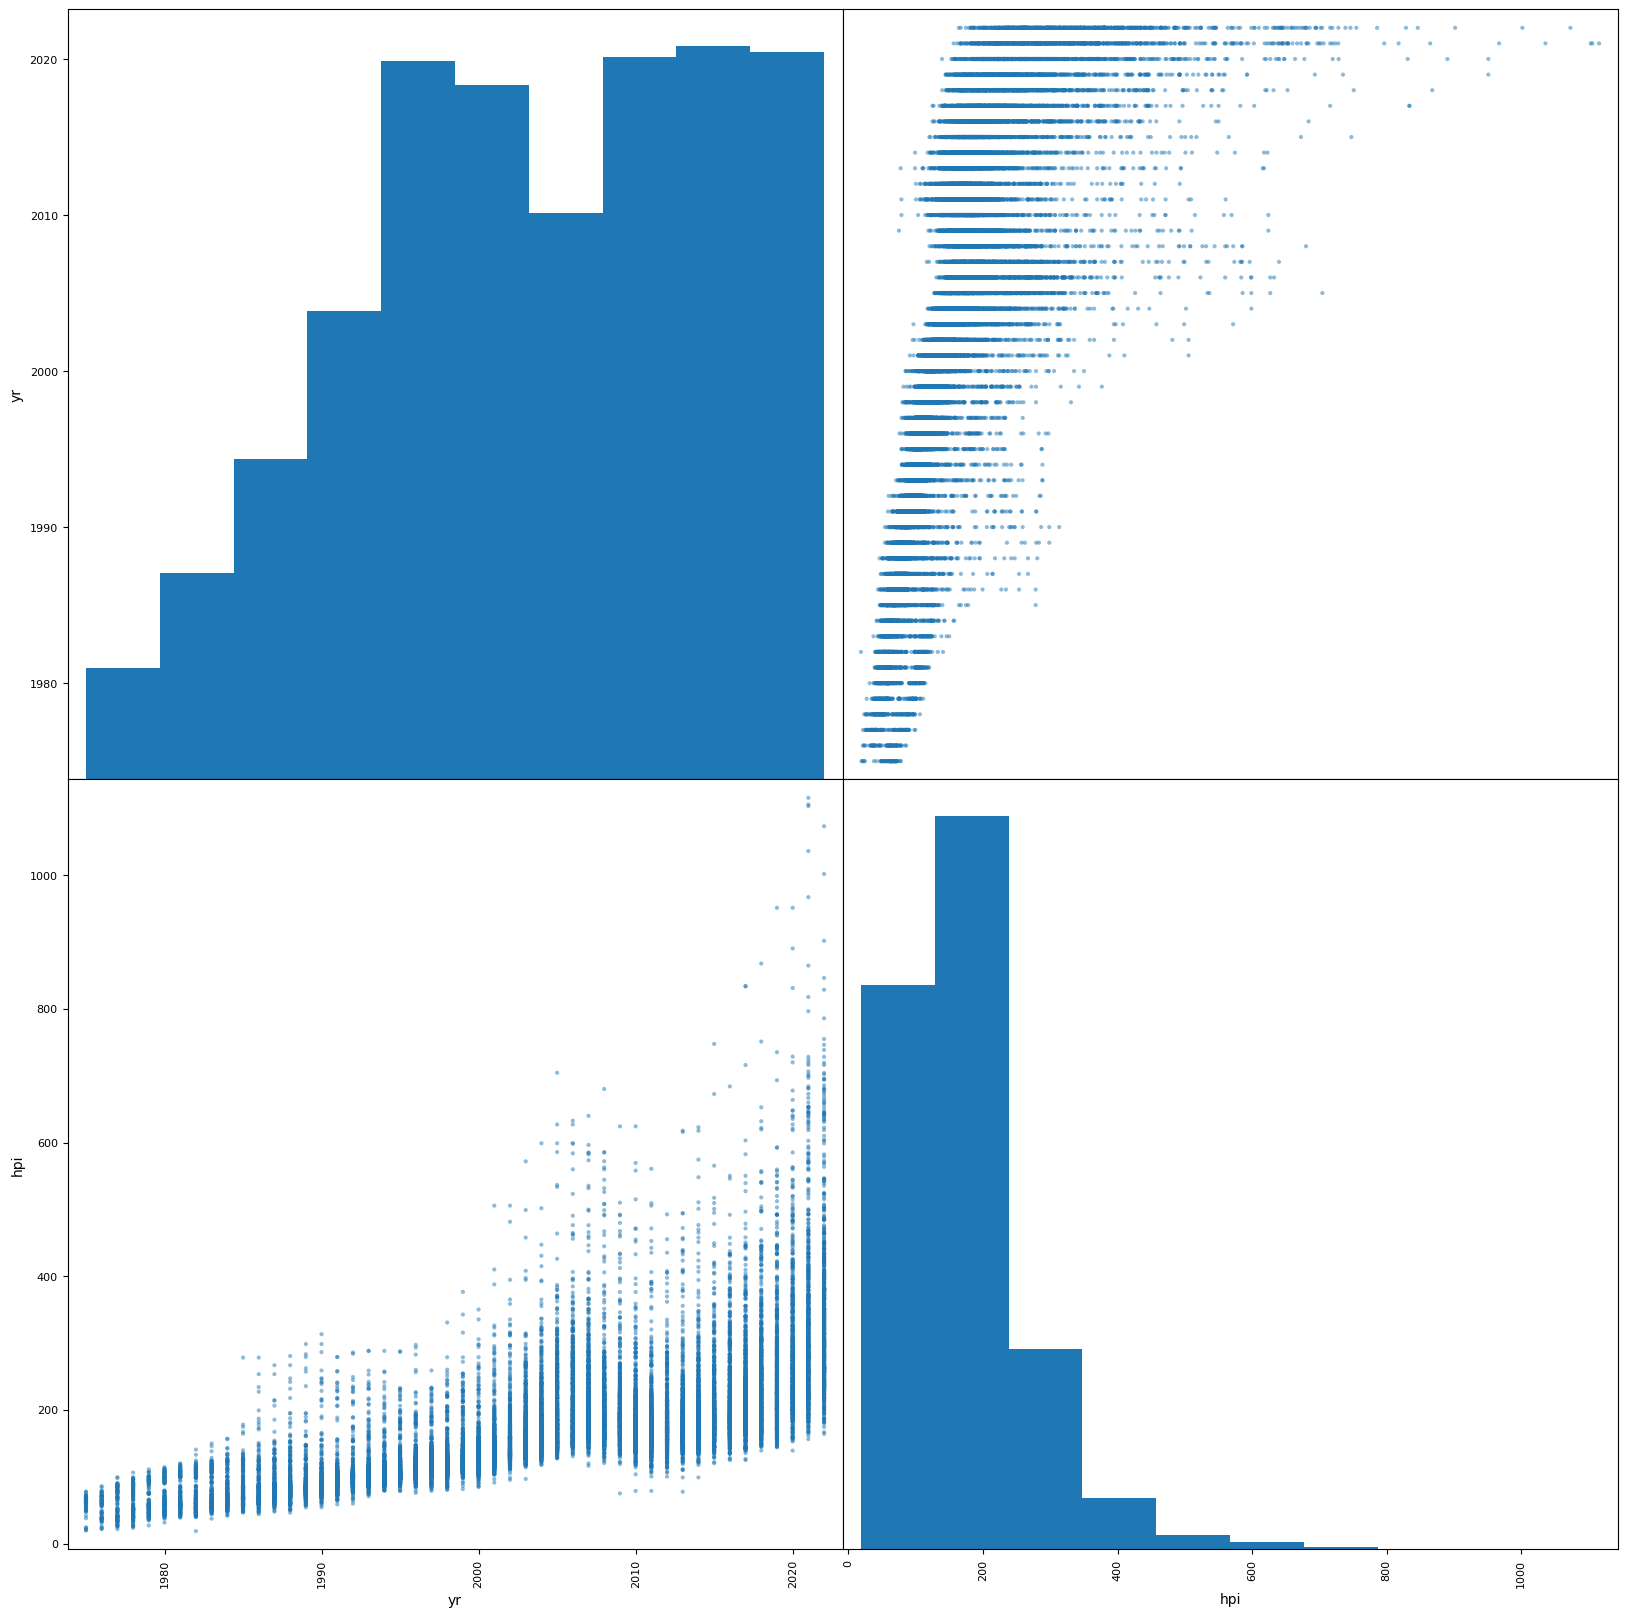

In [35]:
from pandas.plotting import scatter_matrix

attributes = ['yr', 'hpi']
scatter_matrix(df_test_total[attributes], figsize=(20, 20))
plt.show()

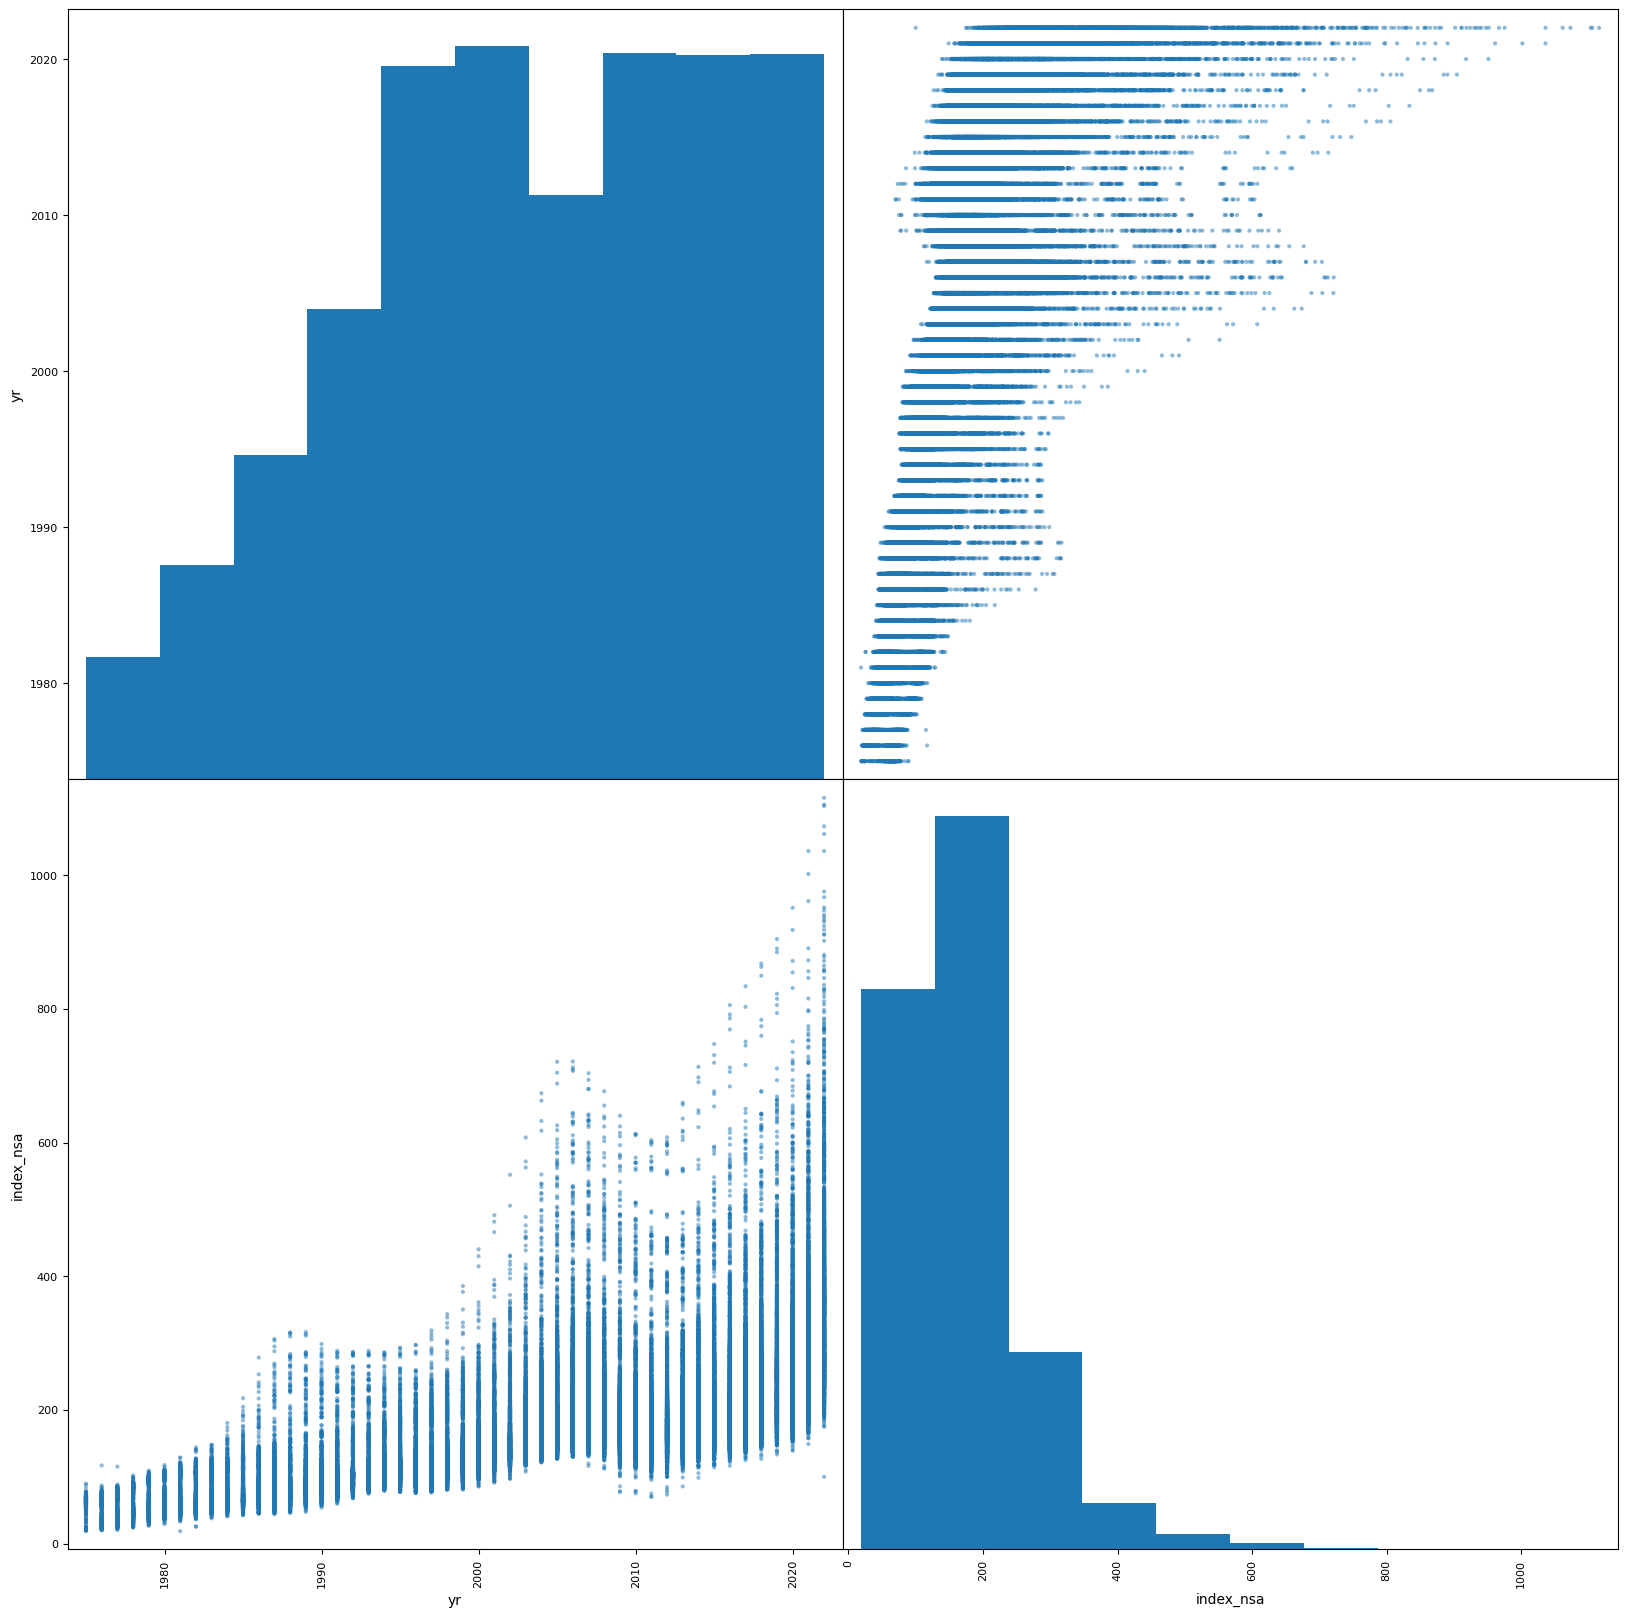

In [36]:
from pandas.plotting import scatter_matrix

attributes = ['yr', 'index_nsa']
scatter_matrix(df_total[attributes], figsize=(20, 20))
plt.show()

### The 2 graphs show an increasing in non linear fashion and there is a decrease during certain time period